In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [3]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [4]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
index_from = 3
word_index = imdb.get_word_index()

imbd_word_index = {key: value + index_from for key, value in word_index.items()}

inv_imbd_word_index = {value: key for key, value in imbd_word_index.items()}

x_train = []
for items in X_train:
  x_train.append([inv_imbd_word_index[index] for index in items if index > index_from])


x_test = []
for items in X_test:
  x_test.append([inv_imbd_word_index[index] for index in items if index > index_from])


import pandas as pd
x_train = [" ".join(item) for item in x_train]
x_test = [" ".join(item) for item in x_test]



In [6]:
df_train = pd.DataFrame(x_train, columns=["review"])
df_train["sentiment"] = y_train
df_train.head(10)

,review,sentiment
0,this film was just brilliant casting location ...,1
1,big hair big boobs bad music and a giant safet...,0
2,this has to be one of the worst films of the 1...,0
3,the scots excel at storytelling the traditiona...,1
4,worst mistake of my life br br i picked this m...,0
5,begins better than it ends funny that the russ...,0
6,lavish production values and solid performance...,1
7,the hamiltons tells the story of the four hami...,0
8,just got out and cannot believe what a brillia...,1
9,this movie has many problem associated with it...,0


In [7]:
df_test = pd.DataFrame(x_test, columns=["review"])
df_test["sentiment"] = y_test
df_test.head(10)

,review,sentiment
0,please give this one a miss br br kristy swans...,0
1,this film requires a lot of patience because i...,1
2,many animation buffs consider wladyslaw starew...,1
3,i generally love this type of movie however th...,0
4,like some other people wrote i'm a die hard ma...,1
5,i'm absolutely disgusted this movie isn't bein...,1
6,originally supposed to be just a part of a hug...,1
7,the emperor's richard haydn dog is betrothed t...,0
8,hollywood had a long love affair with bogus ar...,0
9,this film is where the batman franchise ought ...,1


In [8]:
frames = [df_train, df_test]
df = pd.concat(frames)
df.head()

,review,sentiment
0,this film was just brilliant casting location ...,1
1,big hair big boobs bad music and a giant safet...,0
2,this has to be one of the worst films of the 1...,0
3,the scots excel at storytelling the traditiona...,1
4,worst mistake of my life br br i picked this m...,0


# Text Cleaning

In [9]:
#lowercase
def lowercase(string):
    """
    Args:
        string: a string
    Returns:
        string: a lowercased string
    """
    string_lower = None
    ##BEGIN SOLUTION
    string_lower = string.lower()
    #END SOLUTION
    return string_lower
    
    

In [10]:
import re

#remove URLs
def remove_urls(string):
    """
    Args:
        string: a string
    Returns:
        string: a string with removed urls and emails (if any)
    """
    string_removed_url = None
    #re.sub(pattern, "what to replace in pattern, string")
    string_removed_url = re.sub("http\S+", " ", string)
    string_removed_url = re.sub("\S*@\S*\s", " ", string_removed_url)
    
    return string_removed_url
    

In [11]:
import re
def decontracted(string):

    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'s", " is", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\'t", " not", string)
    string_decontracted = re.sub(r"\'ve", " have", string)
    
    return string_decontracted


In [12]:
#Removing Punctiations and numbers
def remove_punctuations(string):
    string_removed_punctuations = re.sub('[^A-Za-z]+', ' ', string)
    return string_removed_punctuations

# Text Normalization

In [13]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
    
    
def text_normalization(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos="v") \
                              for word in text.split()]

    lemmatized_tokens = [lemmatizer.lemmatize(word, pos="n") \
                              for word in lemmatized_tokens]

    lemmatized_text = " ".join(lemmatized_tokens)
    return lemmatized_text
    
text_normalization("they are playing br are dogs")

# sentence = "I am eating"
# lemmatized_phrase = lemmatize_sentence(sentence)
# print(lemmatized_phrase)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shirs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'they be play br be dog'

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')



def remove_stopwords(text):
        stop_words = stopwords.words("english")
        
        removed_stop_words = [word for word in text.split()\
                            if word not in stop_words]
        return " ".join(removed_stop_words)
remove_stopwords("they be play")
    
     

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shirs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'play'

In [15]:
%%time
df['cleaned'] = df['review'].apply(lowercase)
df['cleaned'] = df['cleaned'].apply(remove_urls)
df['cleaned'] = df['cleaned'].apply(decontracted)
df['cleaned'] = df['cleaned'].apply(remove_punctuations)
df['cleaned'] = df['cleaned'].apply(text_normalization)
df['cleaned'] = df['cleaned'].apply(remove_stopwords)



CPU times: total: 2min 13s
Wall time: 2min 14s


In [16]:
df.head()

,review,sentiment,cleaned
0,this film was just brilliant casting location ...,1,film brilliant cast location scenery story dir...
1,big hair big boobs bad music and a giant safet...,0,big hair big boob bad music giant safety pin w...
2,this has to be one of the worst films of the 1...,0,one worst film friend watch film target audien...
3,the scots excel at storytelling the traditiona...,1,scot excel storytelling traditional sort many ...
4,worst mistake of my life br br i picked this m...,0,worst mistake life br br pick movie target fig...


In [17]:
df.shape

(50000, 3)

In [18]:

# review_lines = []
# lines = df['cleaned'].values.tolist()

# for line in lines:
#     tokens = word(line)

In [19]:

# review_lines = []
# lines = df['cleaned'].values.tolist()
# for text in lines:
#     tokens = [word for word in text.split()]
#     review_lines.append(tokens)


In [20]:
# def take_sentence(text):
#     split_words = text.split()
    
#     return split_words
# take_sentence("they are gone")


In [21]:
# sentences = ['this is sen 1', 'this is sen 2', 'this is sen 3']
# split_sentence = [sentence.split() for sentence in sentences]
# print(split_sentence)

In [22]:
lines = df['cleaned'].tolist()
split_sentence = [sentence.split() for sentence in lines]
print(split_sentence[:3])

[['film', 'brilliant', 'cast', 'location', 'scenery', 'story', 'direction', 'everyone', 'really', 'suit', 'part', 'play', 'could', 'imagine', 'robert', 'redford', 'amaze', 'actor', 'director', 'norman', 'father', 'come', 'scottish', 'island', 'love', 'fact', 'real', 'connection', 'film', 'witty', 'remark', 'throughout', 'film', 'great', 'brilliant', 'much', 'buy', 'film', 'soon', 'release', 'retail', 'would', 'recommend', 'everyone', 'watch', 'fly', 'fish', 'amaze', 'really', 'cry', 'end', 'sad', 'know', 'say', 'cry', 'film', 'must', 'good', 'definitely', 'also', 'congratulation', 'two', 'little', 'boy', 'play', 'part', 'norman', 'paul', 'brilliant', 'child', 'often', 'leave', 'praise', 'list', 'think', 'star', 'play', 'grow', 'big', 'profile', 'whole', 'film', 'child', 'amaze', 'praise', 'think', 'whole', 'story', 'lovely', 'true', 'someone', 'life', 'share', 'u'], ['big', 'hair', 'big', 'boob', 'bad', 'music', 'giant', 'safety', 'pin', 'word', 'best', 'describe', 'terrible', 'movie',

In [23]:
df.head()

,review,sentiment,cleaned
0,this film was just brilliant casting location ...,1,film brilliant cast location scenery story dir...
1,big hair big boobs bad music and a giant safet...,0,big hair big boob bad music giant safety pin w...
2,this has to be one of the worst films of the 1...,0,one worst film friend watch film target audien...
3,the scots excel at storytelling the traditiona...,1,scot excel storytelling traditional sort many ...
4,worst mistake of my life br br i picked this m...,0,worst mistake life br br pick movie target fig...


In [24]:
import gensim
model = gensim.models.Word2Vec(sentences=split_sentence, vector_size=100, window=5, workers=3,min_count=1)

In [25]:
from gensim.models import Word2Vec
Word2Vec?

In [26]:
model.wv.similarity('good', 'better')

0.46828392

In [27]:
model.wv.most_similar("good")

[('decent', 0.7717949151992798),
 ('great', 0.738862931728363),
 ('bad', 0.7091238498687744),
 ('ok', 0.6475087404251099),
 ('nice', 0.6429442763328552),
 ('alright', 0.6212456226348877),
 ('fine', 0.6135038137435913),
 ('cool', 0.6063665747642517),
 ('okay', 0.6023209691047668),
 ('acceptable', 0.5924079418182373)]

In [28]:
model.wv.most_similar(positive=['brilliant'], topn = 5)

[('fantastic', 0.806647777557373),
 ('outstanding', 0.7826603055000305),
 ('excellent', 0.7662943005561829),
 ('superb', 0.7611865401268005),
 ('wonderful', 0.7436712384223938)]

In [29]:
model.wv.save_word2vec_format('imdb_embedding.txt', binary=False)

In [30]:
#word1=[vector]
import os
import numpy as np
embedding_index = {}
f = open('imdb_embedding.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embedding_index[word] = coefs
f.close()


# Tokenization and Padding

In [31]:
max_length = 600
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(split_sentence)
sequences = tokenizer_obj.texts_to_sequences(split_sentence)

# pad sequences
word_index = tokenizer_obj.word_index
print(f"found {len(word_index)} unique tokens ")

review_pad = pad_sequences(sequences, maxlen=max_length)
sentiment = df['sentiment'].values
print(f"Shape of review tensor: {review_pad.shape}")
print(f"Shape of sentiment tensor:", sentiment.shape)

found 58006 unique tokens 
Shape of review tensor: (50000, 600)
Shape of sentiment tensor: (50000,)


In [32]:
word_index

{'br': 1,
 'movie': 2,
 'film': 3,
 'one': 4,
 'make': 5,
 'like': 6,
 'see': 7,
 'get': 8,
 'time': 9,
 'would': 10,
 'good': 11,
 'character': 12,
 'watch': 13,
 'go': 14,
 'even': 15,
 'story': 16,
 'think': 17,
 'really': 18,
 'show': 19,
 'well': 20,
 'scene': 21,
 'look': 22,
 'much': 23,
 'say': 24,
 'know': 25,
 'end': 26,
 'could': 27,
 'bad': 28,
 'people': 29,
 'great': 30,
 'also': 31,
 'first': 32,
 'act': 33,
 'take': 34,
 'give': 35,
 'love': 36,
 'play': 37,
 'way': 38,
 'come': 39,
 'thing': 40,
 'find': 41,
 'seem': 42,
 'work': 43,
 'plot': 44,
 'actor': 45,
 'two': 46,
 'many': 47,
 'year': 48,
 'want': 49,
 'never': 50,
 'life': 51,
 'best': 52,
 'try': 53,
 'little': 54,
 'ever': 55,
 'man': 56,
 'better': 57,
 'still': 58,
 'feel': 59,
 'part': 60,
 'something': 61,
 'director': 62,
 'use': 63,
 'back': 64,
 'lot': 65,
 'interest': 66,
 'real': 67,
 'guy': 68,
 'performance': 69,
 'woman': 70,
 'old': 71,
 'funny': 72,
 'though': 73,
 'cast': 74,
 'star': 75,
 'l

In [33]:
review_pad[100]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [34]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, 100))

for word, i in word_index.items():
  if i > num_words:
    continue
  
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:

    embedding_matrix[i] = embedding_vector

In [35]:
embedding_matrix[2] #embeding matrix form of film

array([-0.80584645, -0.7267542 ,  0.58007854,  1.3807175 , -1.8797559 ,
        0.7839058 , -0.74986315,  0.40057722, -1.3235525 ,  1.0729102 ,
        1.3360181 ,  1.0164748 ,  0.1996079 ,  1.7903364 , -0.29774463,
        1.9275477 ,  2.3577428 ,  1.5053765 , -1.0942929 , -0.9227125 ,
       -0.86842924, -1.5052538 ,  1.0822399 , -0.14800574,  1.1563629 ,
        0.51073015, -1.4616473 ,  0.38912573, -1.1358945 , -0.98033434,
       -0.01681707, -1.9600084 ,  0.0313541 , -2.5778487 , -1.2725146 ,
        0.64999545,  0.49986303, -0.16304438,  1.5072308 ,  0.7415239 ,
       -1.580024  ,  1.3746748 , -1.8486328 , -1.7597002 , -0.05018302,
        1.1209477 ,  0.1447807 ,  0.538794  ,  0.2276703 , -1.601981  ,
       -1.1986331 ,  0.60596675,  0.2726696 , -0.8824379 ,  3.2312152 ,
       -1.8481982 ,  0.47547716, -1.5876609 , -0.75195265,  1.4406071 ,
       -1.3847921 , -1.835281  ,  0.13553339, -0.10639826, -0.9719143 ,
        0.03419889, -1.4920378 ,  0.48436108,  0.9995208 , -0.33

In [36]:
print(num_words)

58007


In [37]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU
from keras.initializers import Constant
from keras.layers import Embedding

model = Sequential()
embedding_layer = Embedding(num_words,
                            100,
                            embeddings_initializer = Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False
                            )
model.add(embedding_layer)
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 100)          5800700   
                                                                 
 gru (GRU)                   (None, 32)                12864     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,813,597
Trainable params: 12,897
Non-trainable params: 5,800,700
_________________________________________________________________
None


In [38]:
VALIDATION_SPLIT = 0.2

indices = np.arange(review_pad.shape[0])
np.random.shuffle(indices)
review_pad = review_pad[indices]
sentiment = sentiment[indices]

num_validation_samples = int(VALIDATION_SPLIT * review_pad.shape[0])

X_train_pad = review_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]

X_test_pad = review_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

In [39]:
print("Train......")

history = model.fit(X_train_pad, y_train, batch_size=16, epochs=5, validation_data=(X_test_pad, y_test),verbose=1)

Train......
Epoch 1/5
2500/2500 [==============================] - 506s 201ms/step - loss: 0.4052 - accuracy: 0.8153 - val_loss: 0.3118 - val_accuracy: 0.8727
Epoch 2/5
2500/2500 [==============================] - 504s 202ms/step - loss: 0.2951 - accuracy: 0.8787 - val_loss: 0.2760 - val_accuracy: 0.8853
Epoch 3/5
2500/2500 [==============================] - 502s 201ms/step - loss: 0.2762 - accuracy: 0.8859 - val_loss: 0.2662 - val_accuracy: 0.8912
Epoch 4/5
2500/2500 [==============================] - 516s 207ms/step - loss: 0.2651 - accuracy: 0.8902 - val_loss: 0.2655 - val_accuracy: 0.8895
Epoch 5/5
2500/2500 [==============================] - 481s 192ms/step - loss: 0.2560 - accuracy: 0.8942 - val_loss: 0.2610 - val_accuracy: 0.8913


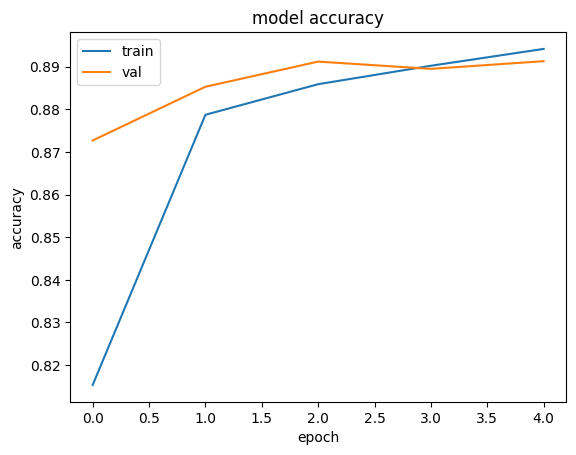

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [41]:
model.save('imdb_model.h5')  # creates a HDF5 file 'my_model.h5'

In [42]:
from keras.models import load_model
new_model = load_model('imdb_model.h5')

In [43]:
#Let us test some  samples
test_sample_1 = "This movie is fantastic! I really like it because it is so good!"
test_sample_2 = "Good movie!"
test_sample_3 = "Maybe I like this movie."
test_sample_4 = "Not to my taste, will skip and watch another movie"
test_sample_5 = "if you like action, then this movie might be good for you."
test_sample_6 = "Bad movie!"
test_sample_7 = "Not a good movie!"
test_sample_8 = "This movie really sucks! Can I get my money back please?"
test_samples = [test_sample_1, test_sample_2, test_sample_3, test_sample_4, test_sample_5, test_sample_6, test_sample_7, test_sample_8]

test_samples_tokens = tokenizer_obj.texts_to_sequences(test_samples)
test_samples_tokens_pad = pad_sequences(test_samples_tokens, maxlen=max_length)

#predict
new_model.predict(x=test_samples_tokens_pad)

1/1 [==============================] - 0s 359ms/step


array([[0.9457419 ],
       [0.4248479 ],
       [0.39695436],
       [0.17927495],
       [0.32871675],
       [0.04448829],
       [0.42484796],
       [0.27920985]], dtype=float32)

In [44]:
#let us check how the model predicts
classes = new_model.predict(X_test_pad[:10], batch_size=16)
for i in range (0,10):
    if(classes[i] > 0.5 and y_test[i] == 1 or (classes[i] <= 0.5 and y_test[i] == 0)):
        print( classes[i], y_test[i], " Right prdiction")
    else :
        print( classes[i], y_test[i], " Wrong prdiction")

1/1 [==============================] - 0s 85ms/step
[0.9808314] 1  Right prdiction
[0.01761146] 0  Right prdiction
[0.9939229] 1  Right prdiction
[0.4177298] 0  Right prdiction
[0.07706896] 0  Right prdiction
[0.0524203] 0  Right prdiction
[0.5584901] 0  Wrong prdiction
[0.00453496] 0  Right prdiction
[0.55624604] 1  Right prdiction
[0.00879513] 0  Right prdiction
